### 평가지표

In [1]:
import os
import json
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def normalize_label(label):
    label = label.lower().strip()
    if label in {"yes", "no", "maybe"}:
        return label
    if "not prepared" in label or "urgent measures" in label:
        return "no"
    elif "well positioned" in label or "can cope" in label or "ready" in label:
        return "yes"
    else:
        return "error"

def evaluate_result_file(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)

    preds = [normalize_label(ex["prediction"]) for ex in data]
    labels = [normalize_label(ex["label"]) for ex in data]

    acc = round(accuracy_score(labels, preds), 4)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro', zero_division=0)

    filename = os.path.basename(filepath)

    if "metaicl_model_" in filename:
        model_num = filename.split("metaicl_model_")[1].split("_")[0]
        model = f"metaicl_{model_num}"
        k = filename.split("eval_k")[1].split(".")[0] if "eval_k" in filename else "NA"
    else:
        model = filename.split("results_")[1].split("_k")[0]
        k = filename.split("_k")[1].split(".")[0]

    return {
        "file": filename,
        "model": model,
        "k": int(k),
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


def summarize_all_results(file_list):
    all_metrics = [evaluate_result_file(f) for f in file_list]
    df = pd.DataFrame(all_metrics)
    return df


In [2]:
import os
import glob  # glob 모듈 임포트

# 평가 결과가 저장된 폴더
results_dir = "../final_results"

# 결과 파일 리스트 가져오기 (glob.glob을 써야 함)
result_files = sorted(glob.glob(os.path.join(results_dir, "results_*.json")))

df_result = summarize_all_results(result_files)
df_result.sort_values(by=["accuracy"], inplace=True)
df_result

,file,model,k,accuracy,precision,recall,f1
13,results_metaicl_model_k16_eval_k1.json,metaicl_k16,1,0.34,0.278986,0.321779,0.196279
19,results_metaicl_model_k1_eval_k1.json,metaicl_k1,1,0.34,0.280142,0.325630,0.188889
25,results_metaicl_model_k2_eval_k1.json,metaicl_k2,1,0.35,0.314695,0.331583,0.200766
1,results_ia3_k1.json,ia3,1,0.36,0.383883,0.337535,0.214383
7,results_metaicl_model_k0_eval_k1.json,metaicl_k0,1,0.36,0.382609,0.337535,0.213028
31,results_metaicl_model_k4_eval_k1.json,metaicl_k4,1,0.36,0.338164,0.337535,0.212323
43,results_qwen_k1.json,qwen,1,0.36,0.380142,0.337535,0.210383
37,results_metaicl_model_k8_eval_k1.json,metaicl_k8,1,0.37,0.384946,0.347339,0.216944
3,results_ia3_k2.json,ia3,2,0.38,0.286842,0.314776,0.269462
41,results_metaicl_model_k8_eval_k8.json,metaicl_k8,8,0.38,0.340741,0.349440,0.233581


## 표

In [3]:
df_result[df_result['model'] == 'qwen'].sort_index()

,file,model,k,accuracy,precision,recall,f1
42,results_qwen_k0.json,qwen,0,0.56,0.486497,0.484804,0.485594
43,results_qwen_k1.json,qwen,1,0.36,0.380142,0.337535,0.210383
44,results_qwen_k16.json,qwen,16,0.46,0.345299,0.366246,0.326410
45,results_qwen_k2.json,qwen,2,0.42,0.338247,0.357843,0.292498
46,results_qwen_k4.json,qwen,4,0.47,0.382503,0.384174,0.373030
47,results_qwen_k8.json,qwen,8,0.41,0.325655,0.359594,0.271513


In [4]:
df_result[df_result['model'] == 'ia3'].sort_index()

,file,model,k,accuracy,precision,recall,f1
0,results_ia3_k0.json,ia3,0,0.51,0.418398,0.420378,0.407559
1,results_ia3_k1.json,ia3,1,0.36,0.383883,0.337535,0.214383
2,results_ia3_k16.json,ia3,16,0.50,0.433085,0.413585,0.397491
3,results_ia3_k2.json,ia3,2,0.38,0.286842,0.314776,0.269462
4,results_ia3_k4.json,ia3,4,0.44,0.356375,0.358613,0.349962
5,results_ia3_k8.json,ia3,8,0.42,0.398990,0.373249,0.272903


In [5]:
df_result[df_result['model'] == 'metaicl_k0'].sort_index()

,file,model,k,accuracy,precision,recall,f1
6,results_metaicl_model_k0_eval_k0.json,metaicl_k0,0,0.50,0.443777,0.437535,0.440048
7,results_metaicl_model_k0_eval_k1.json,metaicl_k0,1,0.36,0.382609,0.337535,0.213028
8,results_metaicl_model_k0_eval_k16.json,metaicl_k0,16,0.51,0.425616,0.431092,0.403446
9,results_metaicl_model_k0_eval_k2.json,metaicl_k0,2,0.44,0.405330,0.385574,0.352318
10,results_metaicl_model_k0_eval_k4.json,metaicl_k0,4,0.45,0.326994,0.337185,0.324578
11,results_metaicl_model_k0_eval_k8.json,metaicl_k0,8,0.44,0.380918,0.381303,0.296882


In [6]:
df_result[df_result['model'] == 'metaicl_k1'].sort_index()

,file,model,k,accuracy,precision,recall,f1
18,results_metaicl_model_k1_eval_k0.json,metaicl_k1,0,0.48,0.376876,0.374720,0.373959
19,results_metaicl_model_k1_eval_k1.json,metaicl_k1,1,0.34,0.280142,0.325630,0.188889
20,results_metaicl_model_k1_eval_k16.json,metaicl_k1,16,0.52,0.373097,0.401961,0.372215
21,results_metaicl_model_k1_eval_k2.json,metaicl_k1,2,0.50,0.549020,0.456373,0.438375
22,results_metaicl_model_k1_eval_k4.json,metaicl_k1,4,0.49,0.399017,0.396078,0.387128
23,results_metaicl_model_k1_eval_k8.json,metaicl_k1,8,0.41,0.375184,0.363445,0.267417


In [7]:
df_result[df_result['model'] == 'metaicl_k2'].sort_index()

,file,model,k,accuracy,precision,recall,f1
24,results_metaicl_model_k2_eval_k0.json,metaicl_k2,0,0.53,0.476907,0.486625,0.481200
25,results_metaicl_model_k2_eval_k1.json,metaicl_k2,1,0.35,0.314695,0.331583,0.200766
26,results_metaicl_model_k2_eval_k16.json,metaicl_k2,16,0.53,0.391101,0.423319,0.379641
27,results_metaicl_model_k2_eval_k2.json,metaicl_k2,2,0.39,0.319035,0.332283,0.276190
28,results_metaicl_model_k2_eval_k4.json,metaicl_k2,4,0.48,0.385588,0.393978,0.381456
29,results_metaicl_model_k2_eval_k8.json,metaicl_k2,8,0.41,0.353375,0.367297,0.263265


In [8]:
df_result[df_result['model'] == 'metaicl_k4'].sort_index()

,file,model,k,accuracy,precision,recall,f1
30,results_metaicl_model_k4_eval_k0.json,metaicl_k4,0,0.60,0.501058,0.477381,0.485207
31,results_metaicl_model_k4_eval_k1.json,metaicl_k4,1,0.36,0.338164,0.337535,0.212323
32,results_metaicl_model_k4_eval_k16.json,metaicl_k4,16,0.43,0.467695,0.360364,0.353311
33,results_metaicl_model_k4_eval_k2.json,metaicl_k4,2,0.43,0.409505,0.383473,0.341767
34,results_metaicl_model_k4_eval_k4.json,metaicl_k4,4,0.51,0.374137,0.388305,0.367895
35,results_metaicl_model_k4_eval_k8.json,metaicl_k4,8,0.42,0.366013,0.369398,0.276956


In [9]:
df_result[df_result['model'] == 'metaicl_k8'].sort_index()

,file,model,k,accuracy,precision,recall,f1
36,results_metaicl_model_k8_eval_k0.json,metaicl_k8,0,0.50,0.390681,0.390476,0.388815
37,results_metaicl_model_k8_eval_k1.json,metaicl_k8,1,0.37,0.384946,0.347339,0.216944
38,results_metaicl_model_k8_eval_k16.json,metaicl_k8,16,0.48,0.414785,0.413235,0.380383
39,results_metaicl_model_k8_eval_k2.json,metaicl_k8,2,0.41,0.352853,0.355742,0.287120
40,results_metaicl_model_k8_eval_k4.json,metaicl_k8,4,0.54,0.440431,0.445098,0.425677
41,results_metaicl_model_k8_eval_k8.json,metaicl_k8,8,0.38,0.340741,0.349440,0.233581


In [10]:
df_result[df_result['model'] == 'metaicl_k16'].sort_index()

,file,model,k,accuracy,precision,recall,f1
12,results_metaicl_model_k16_eval_k0.json,metaicl_k16,0,0.50,0.377551,0.370798,0.372751
13,results_metaicl_model_k16_eval_k1.json,metaicl_k16,1,0.34,0.278986,0.321779,0.196279
14,results_metaicl_model_k16_eval_k16.json,metaicl_k16,16,0.47,0.388268,0.395728,0.374196
15,results_metaicl_model_k16_eval_k2.json,metaicl_k16,2,0.39,0.353758,0.351961,0.310566
16,results_metaicl_model_k16_eval_k4.json,metaicl_k16,4,0.45,0.330532,0.341036,0.325890
17,results_metaicl_model_k16_eval_k8.json,metaicl_k16,8,0.39,0.361198,0.351541,0.250401


## 그래프

/tmp/ipykernel_7063/3303469259.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")


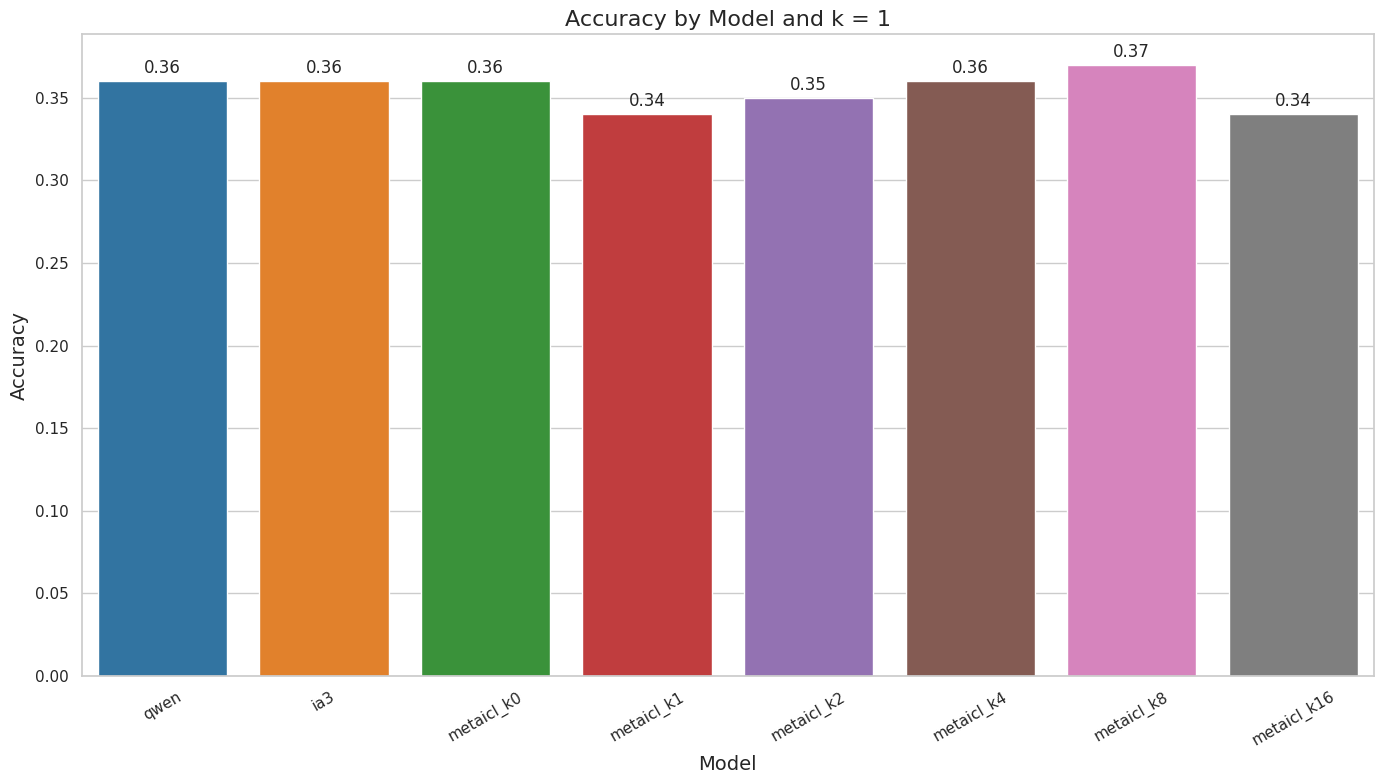

/tmp/ipykernel_7063/3303469259.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")


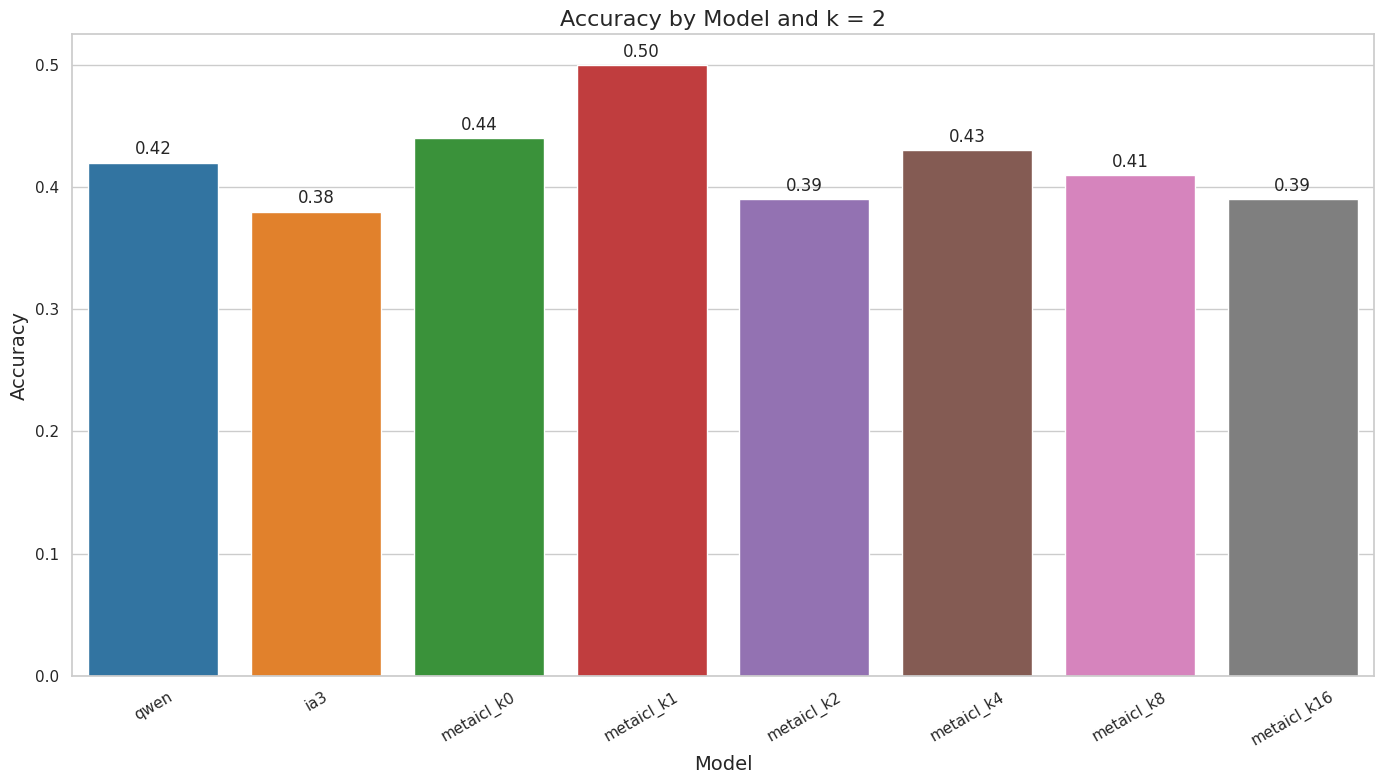

/tmp/ipykernel_7063/3303469259.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")


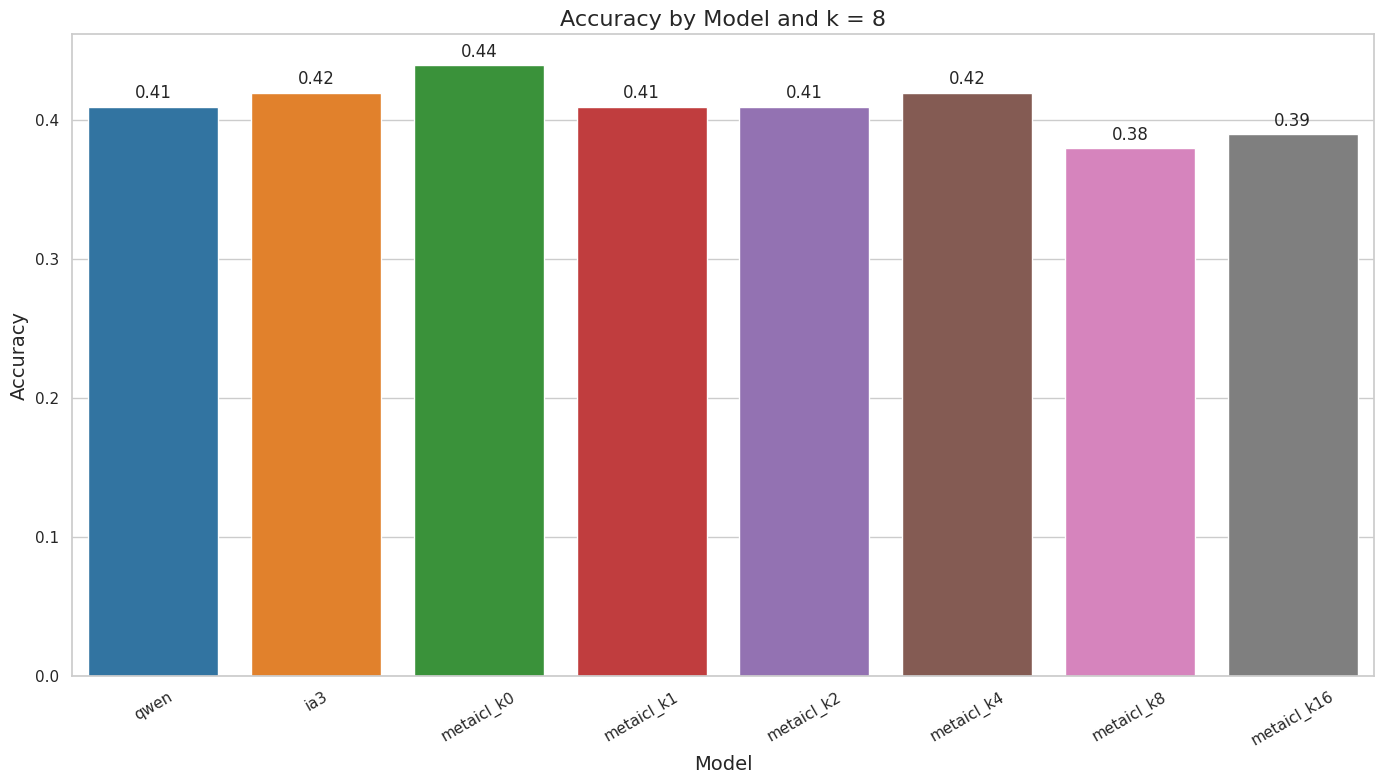

/tmp/ipykernel_7063/3303469259.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")


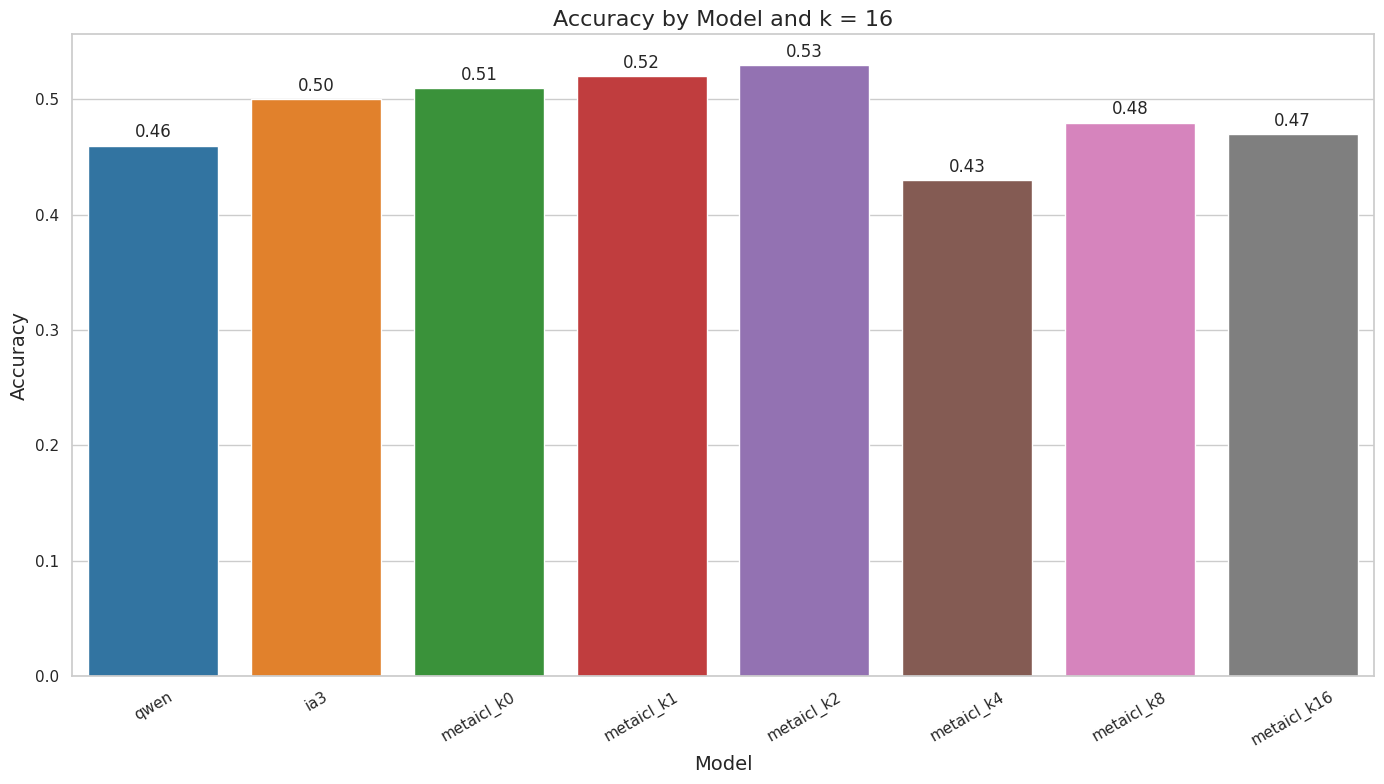

/tmp/ipykernel_7063/3303469259.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")


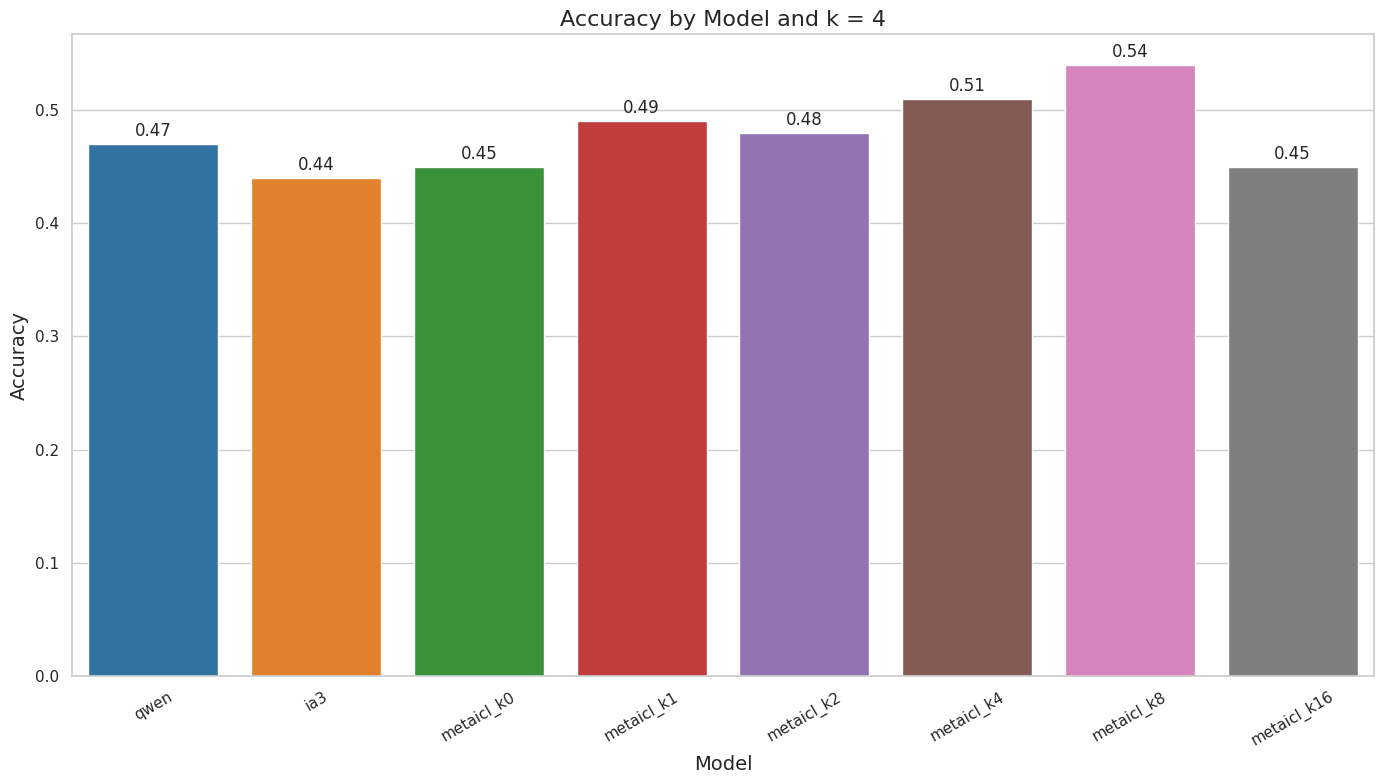

/tmp/ipykernel_7063/3303469259.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")


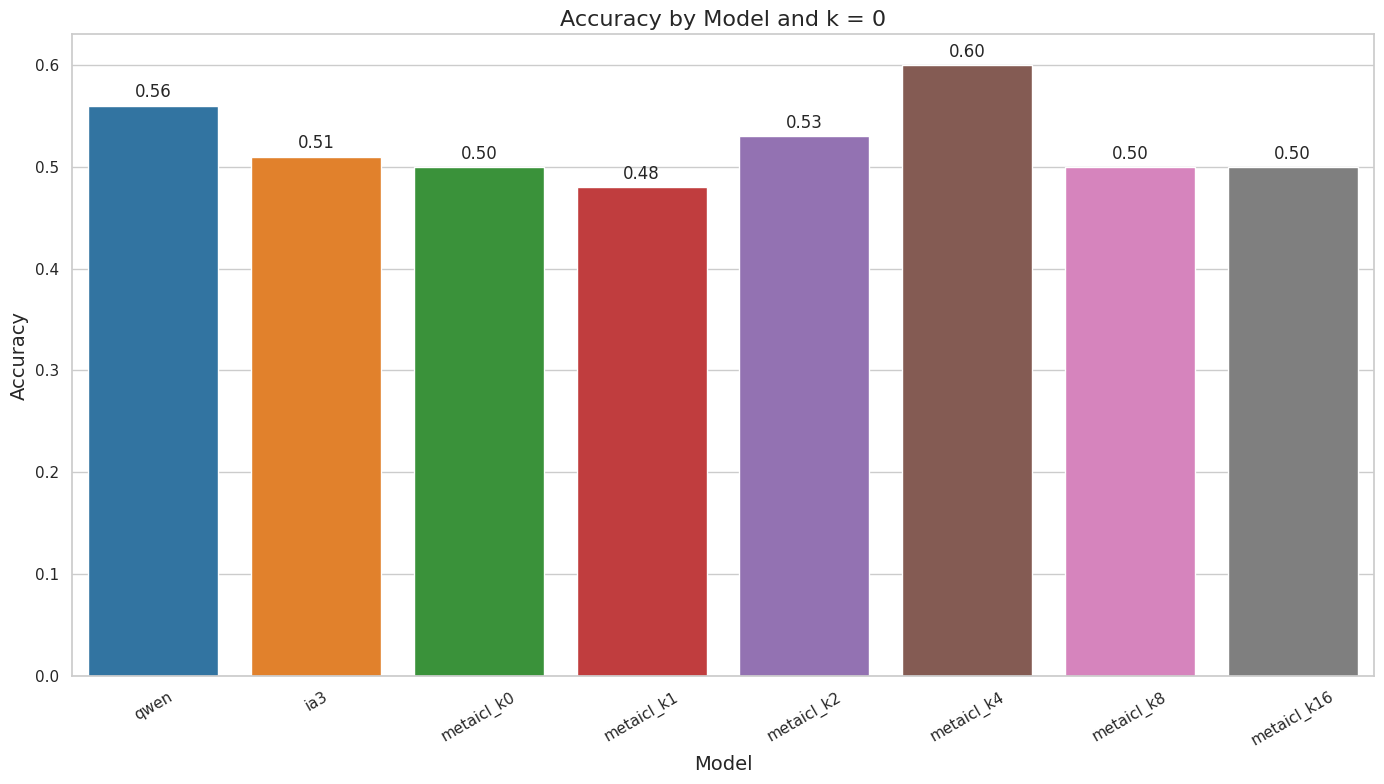

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # 혹시 빠졌을 수도 있으니 추가

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 원하는 모델 순서 지정
model_order = ['qwen', 'ia3', 'metaicl_k0','metaicl_k1', 'metaicl_k2', 'metaicl_k4', 'metaicl_k8', 'metaicl_k16']

for k in df_result['k'].unique():
    # k 값에 해당하는 데이터 필터링
    df_k = df_result[df_result['k'] == k].copy()

    # model 컬럼을 범주형으로 변환, 순서 지정
    df_k['model'] = pd.Categorical(df_k['model'], categories=model_order, ordered=True)
    
    # 모델별 Accuracy 시각화
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=df_k, x="model", y="accuracy", palette="tab10")

    # 각 바 위에 accuracy 값 표시
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

    plt.title(f"Accuracy by Model and k = {k}", fontsize=16)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

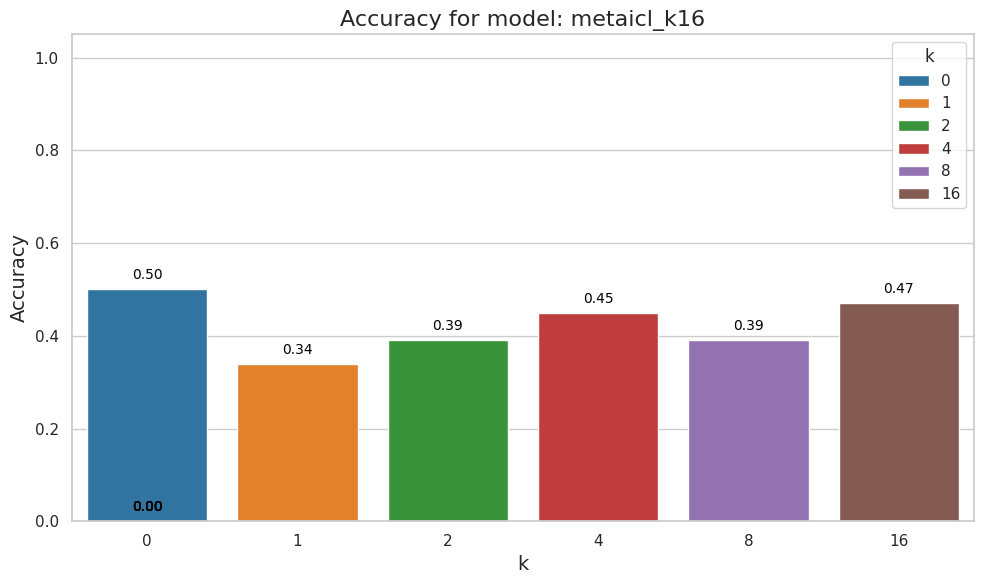

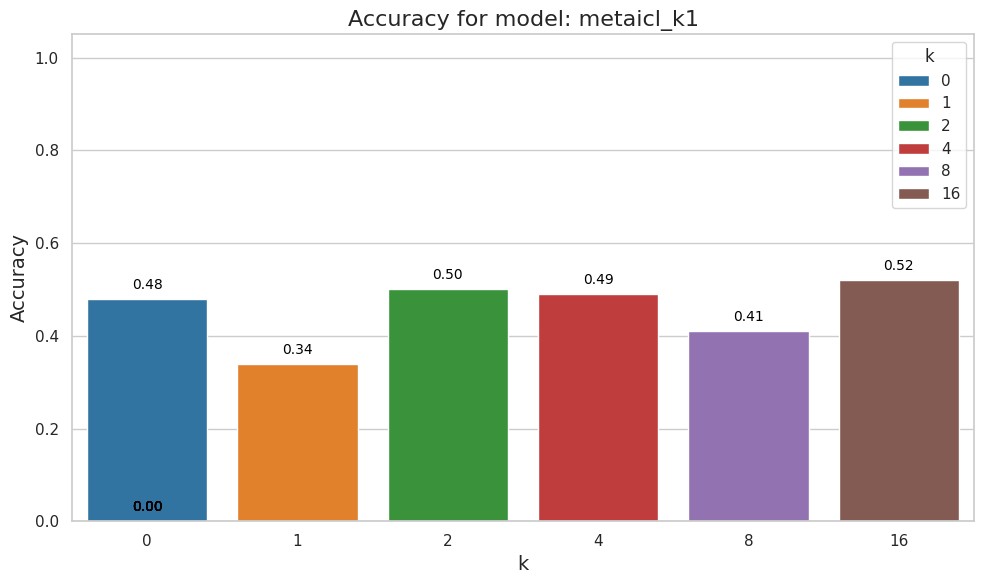

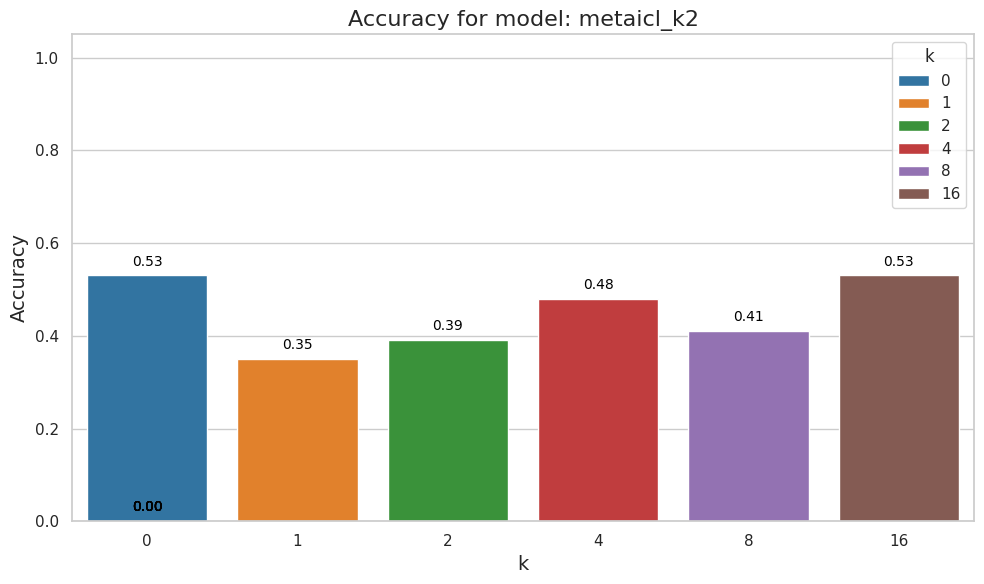

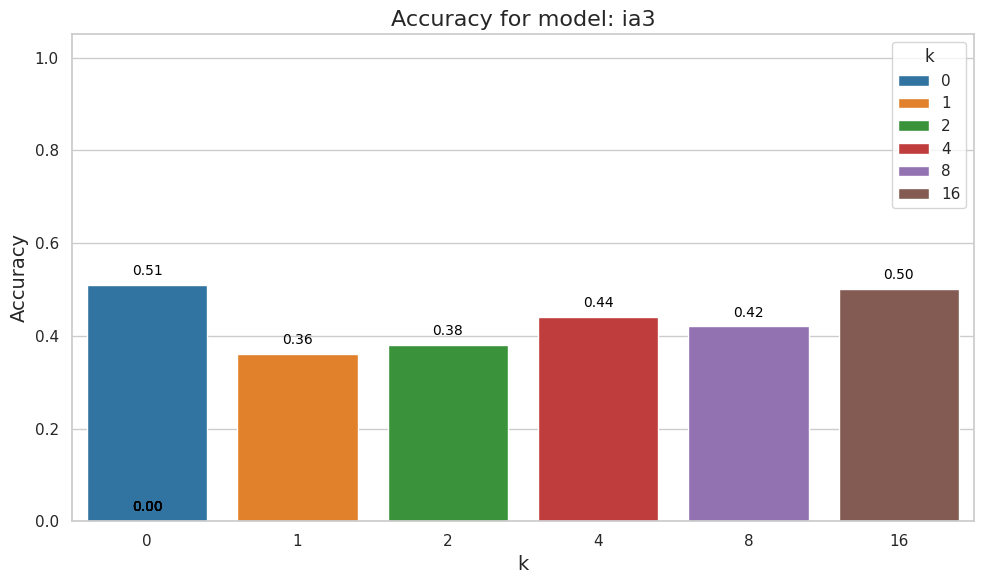

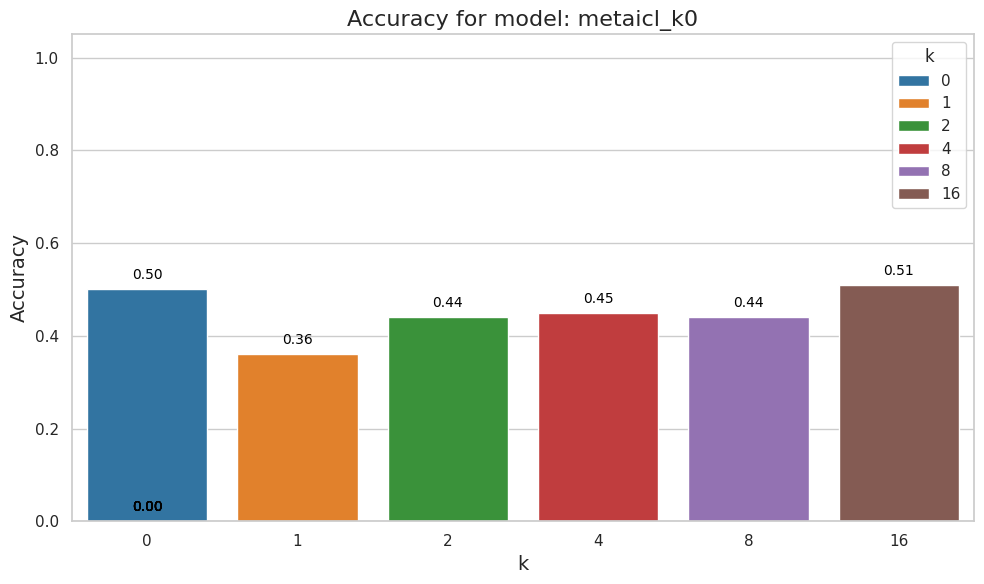

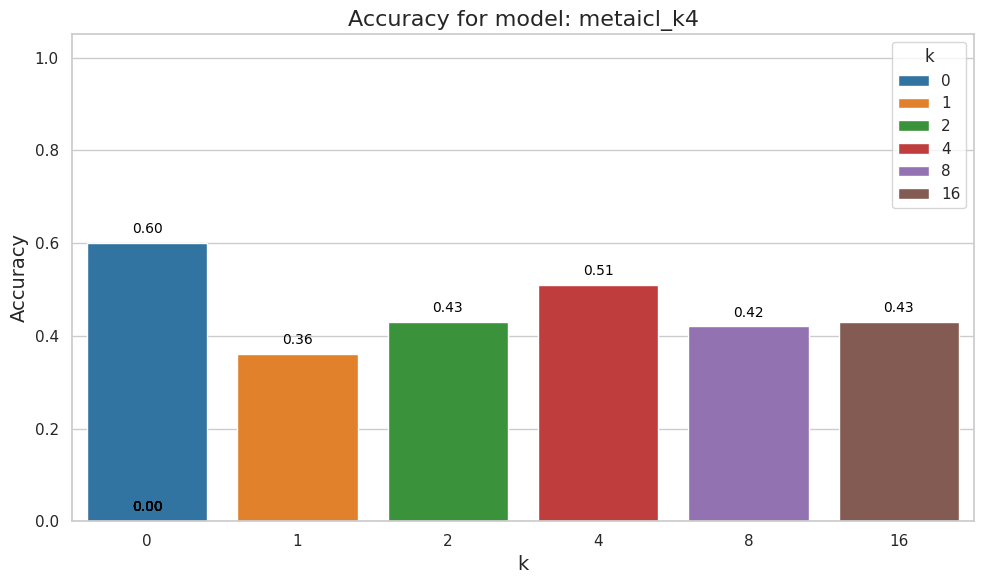

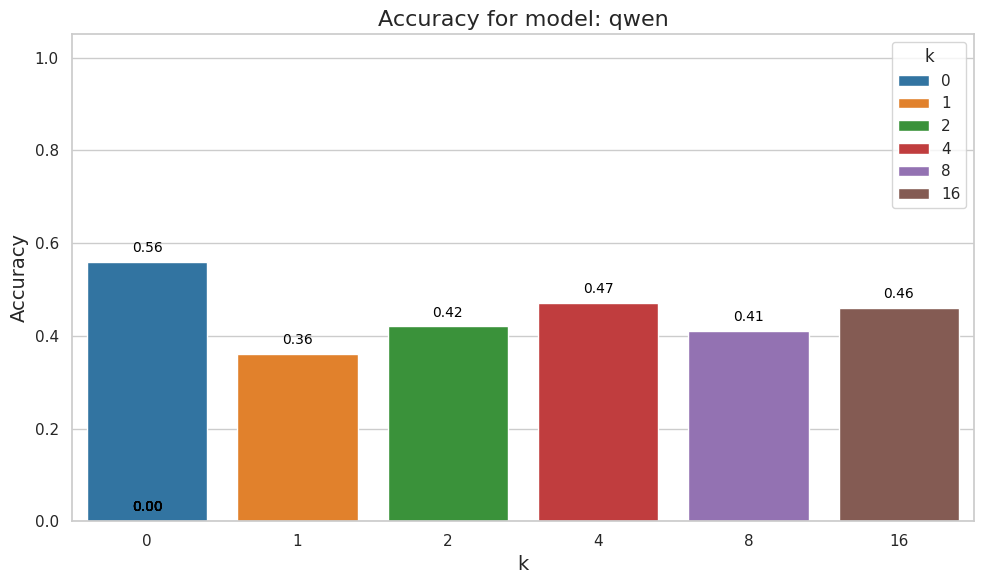

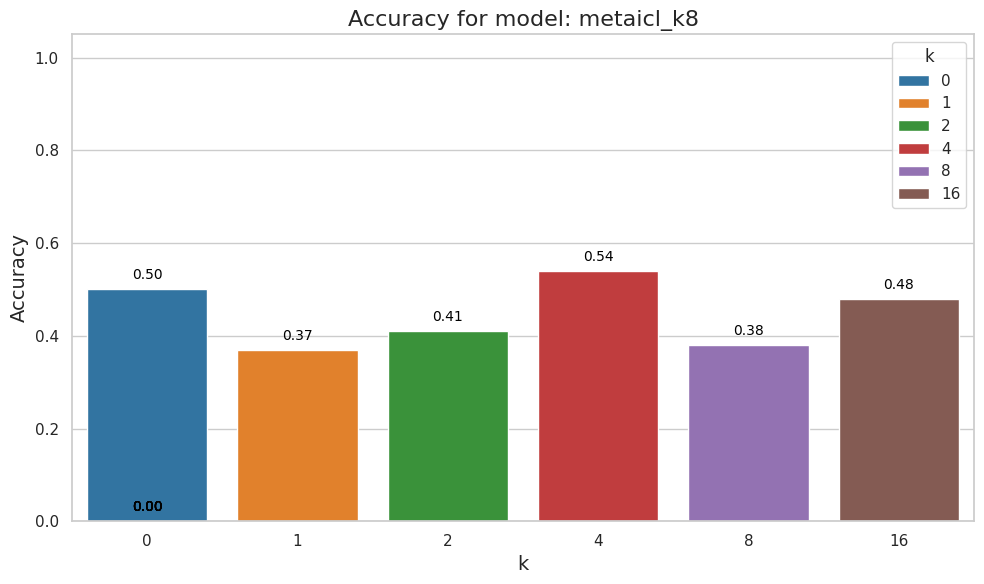

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for model_name in df_result['model'].unique():
    df_model = df_result[df_result['model'] == model_name]

    plt.figure(figsize=(10, 6))
    
    # 막대그래프
    ax = sns.barplot(data=df_model, x="k", y="accuracy", hue="k", palette="tab10")
    
    # 각 막대 위에 정확도 값 표시
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')
    
    plt.title(f"Accuracy for model: {model_name}", fontsize=16)
    plt.xlabel("k", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.ylim(0, 1.05)
    plt.legend(title="k", loc='upper right')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


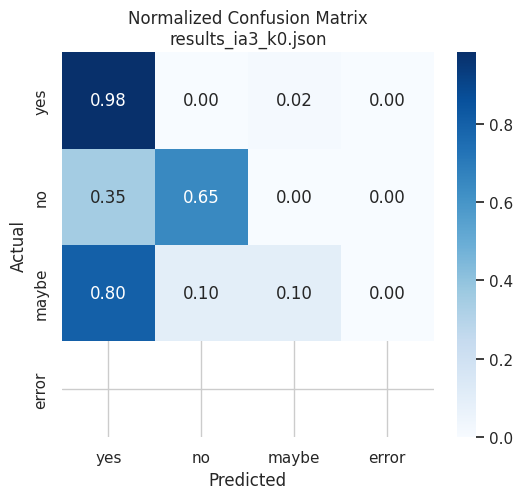

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


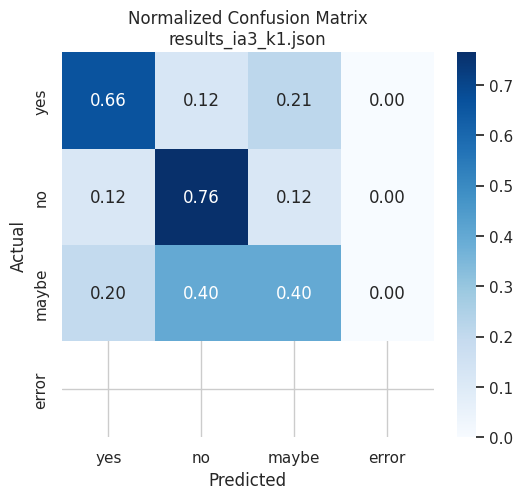

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


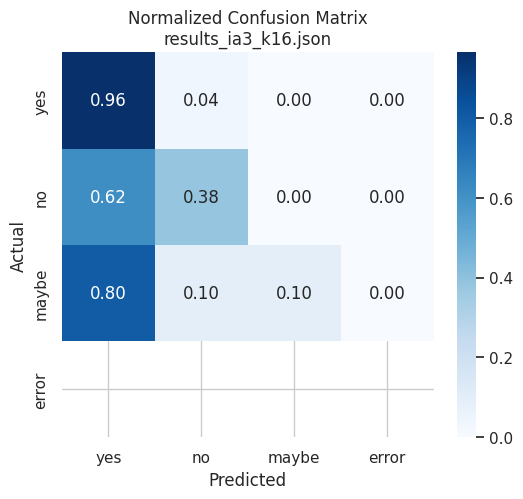

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


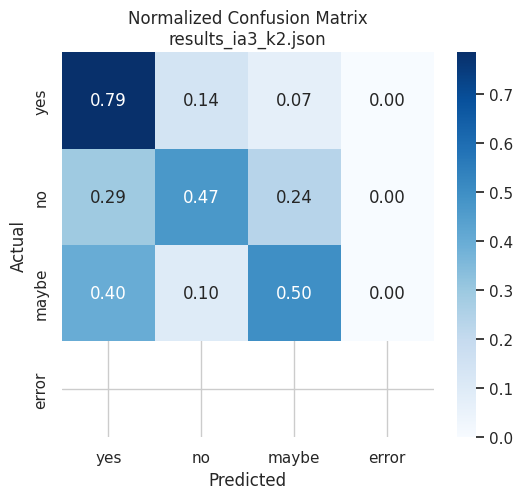

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


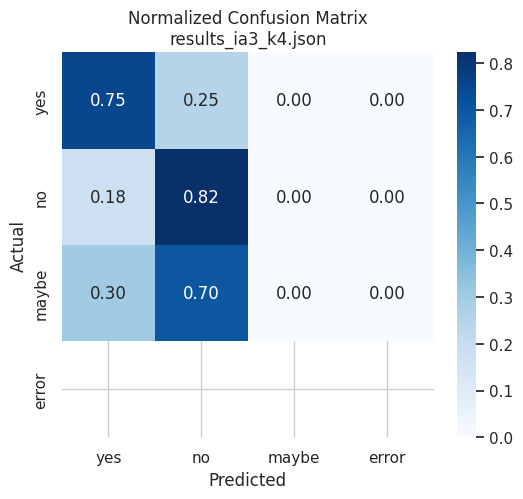

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


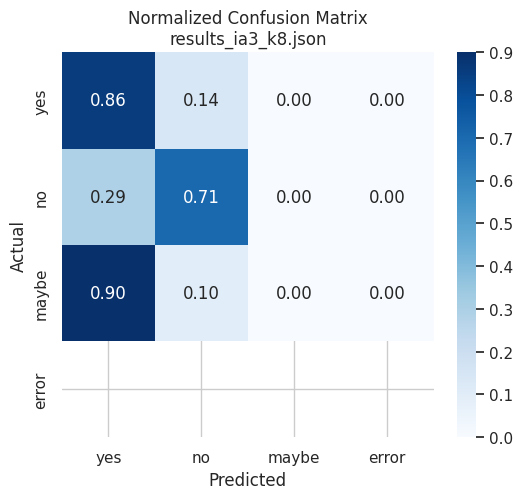

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


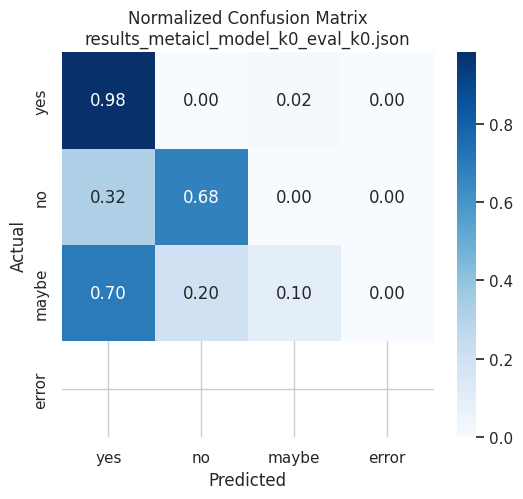

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


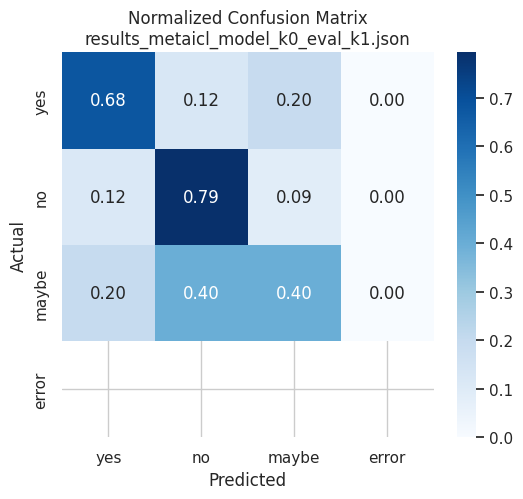

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


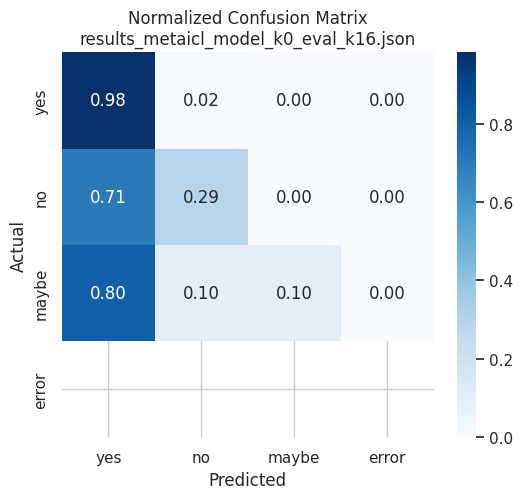

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


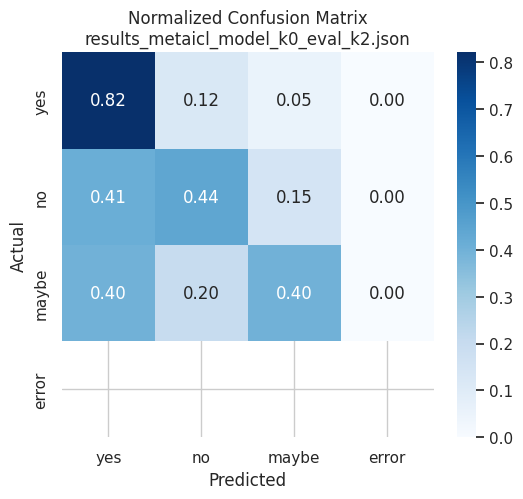

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


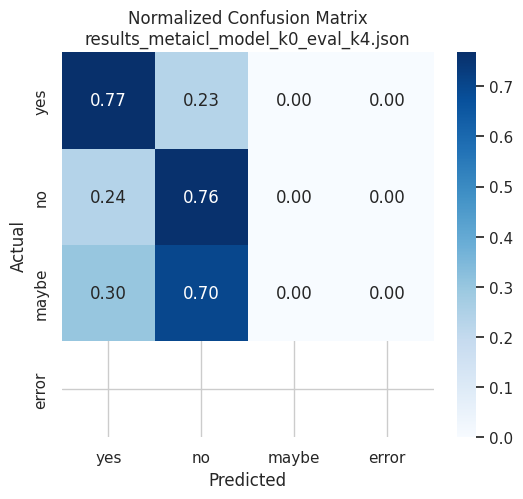

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


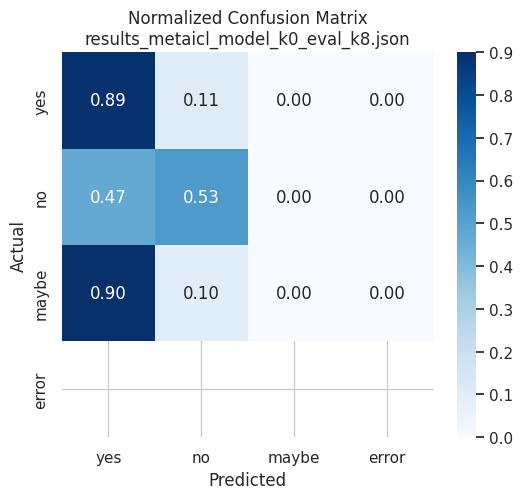

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


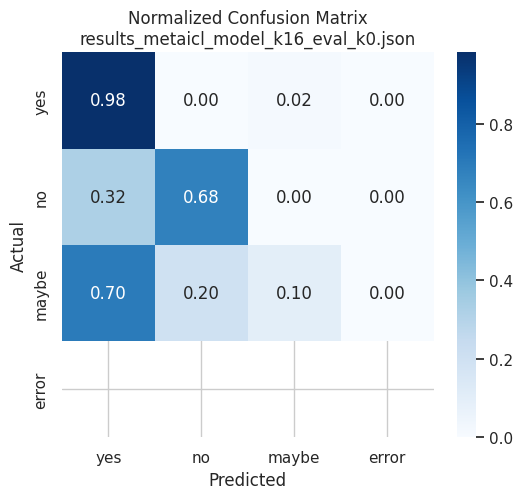

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


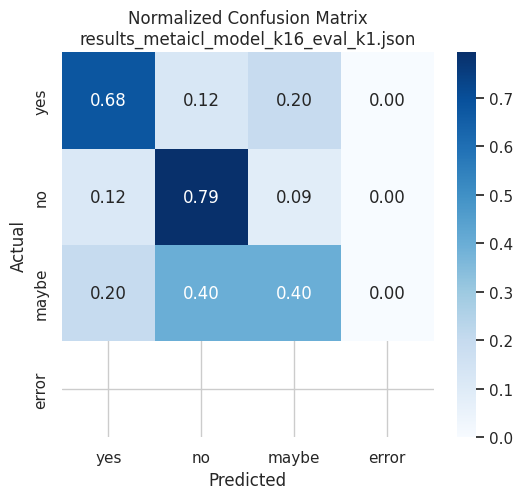

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


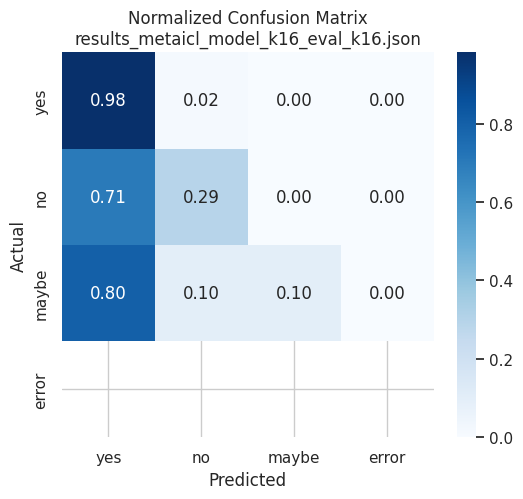

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


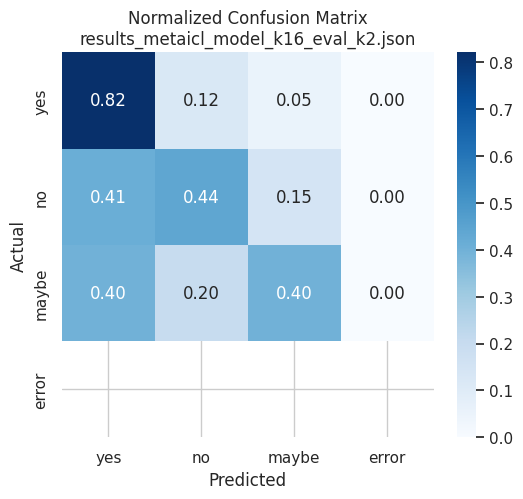

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


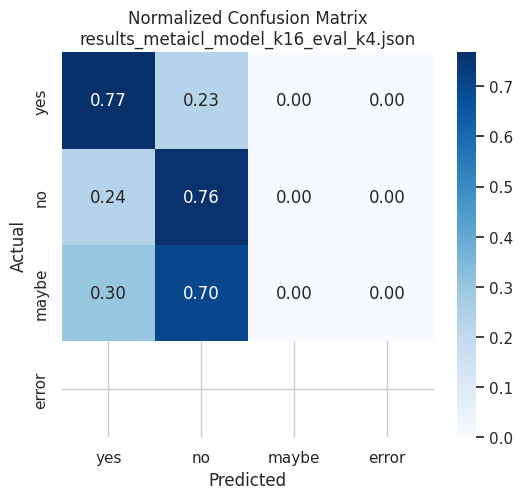

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


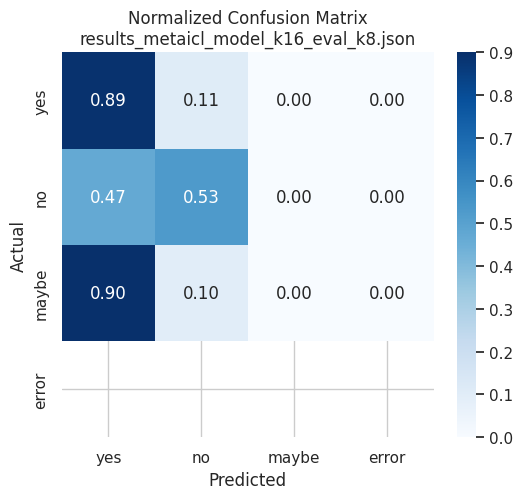

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


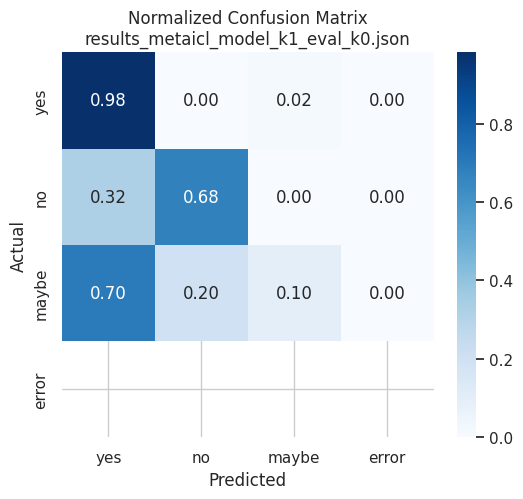

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


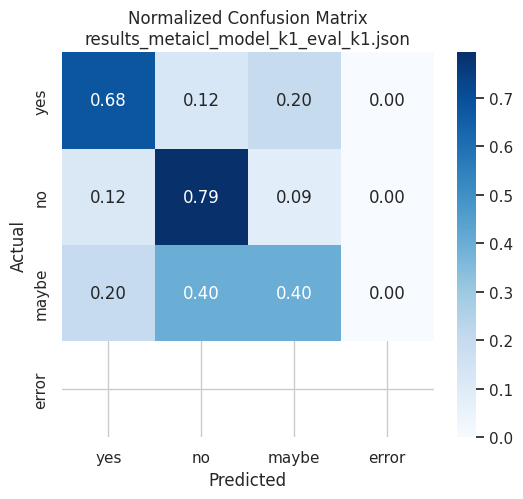

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


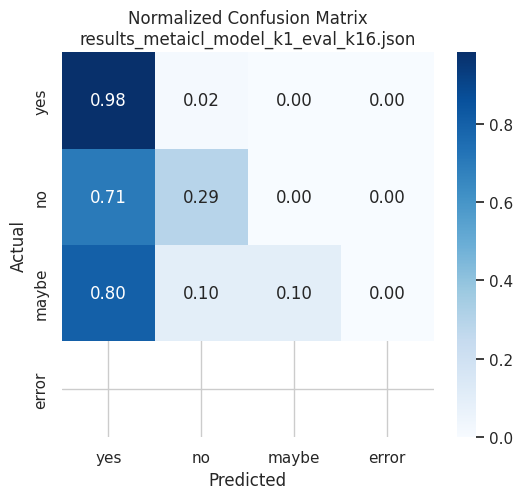

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


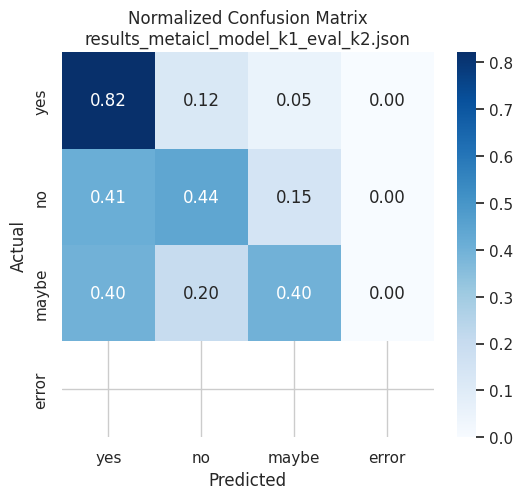

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


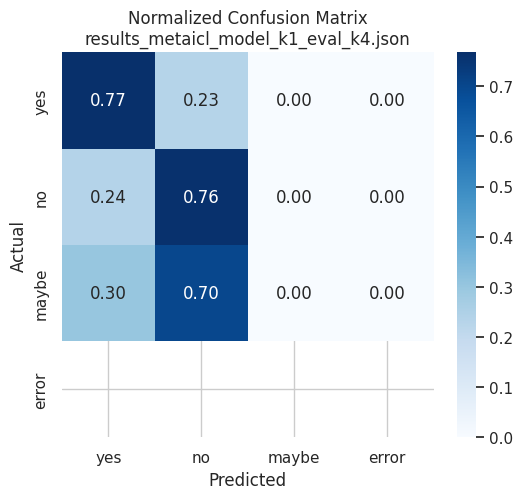

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


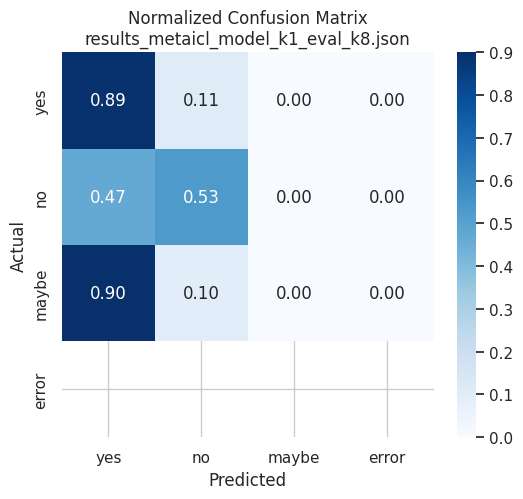

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


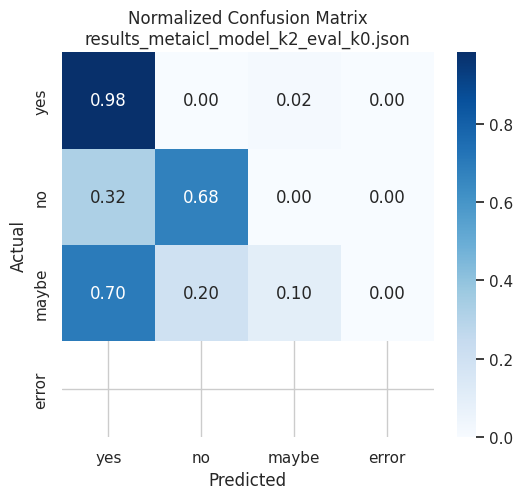

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


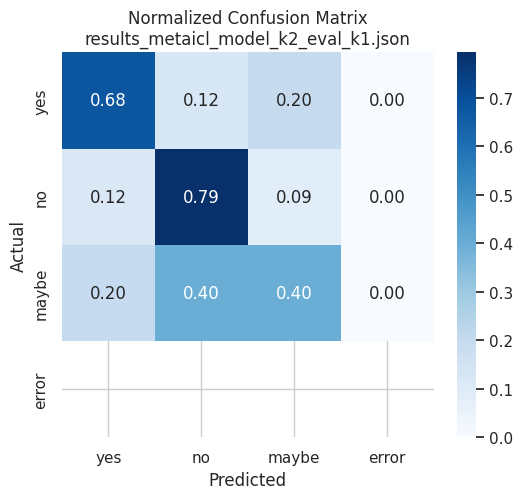

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


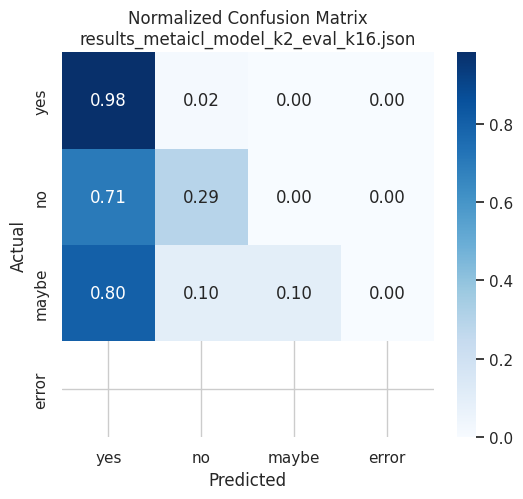

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


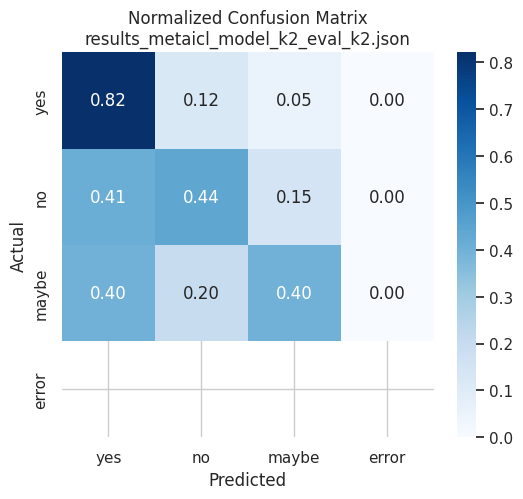

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


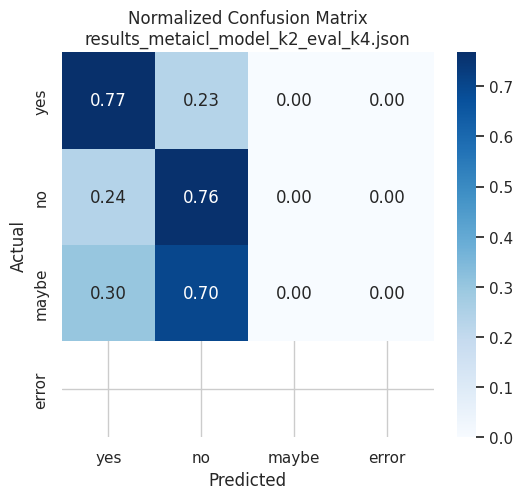

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


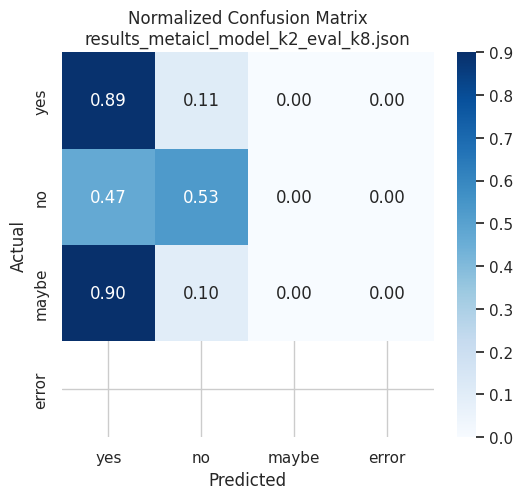

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


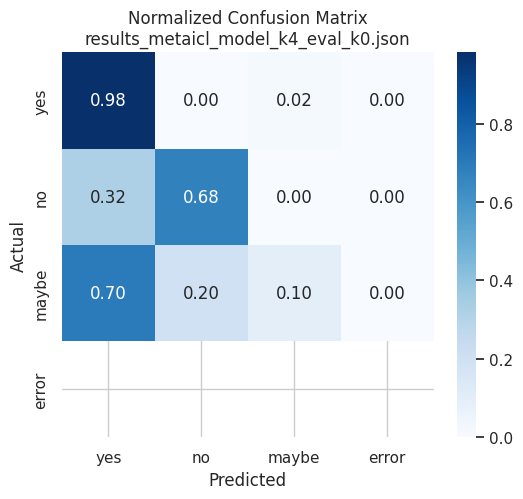

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


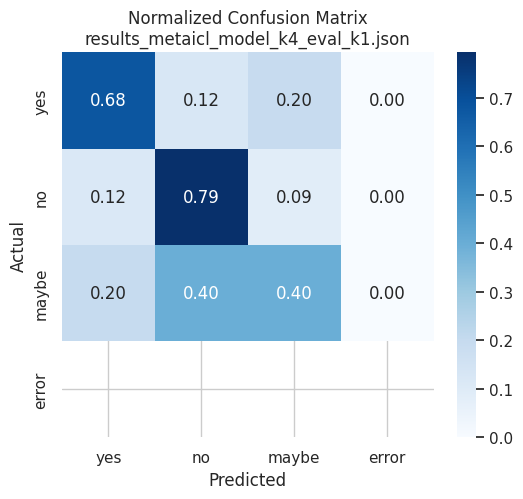

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


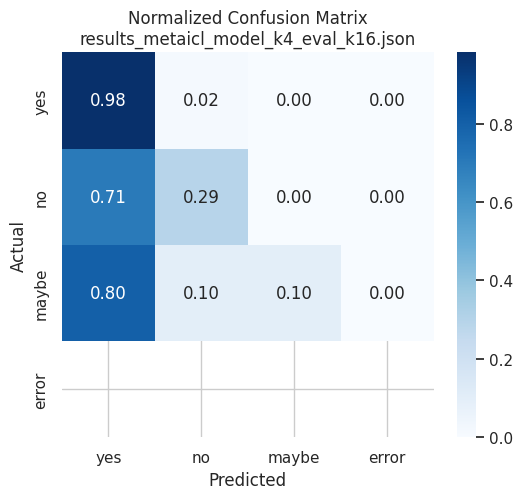

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


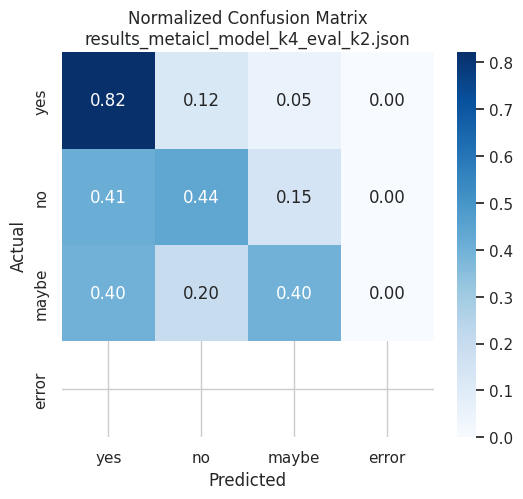

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


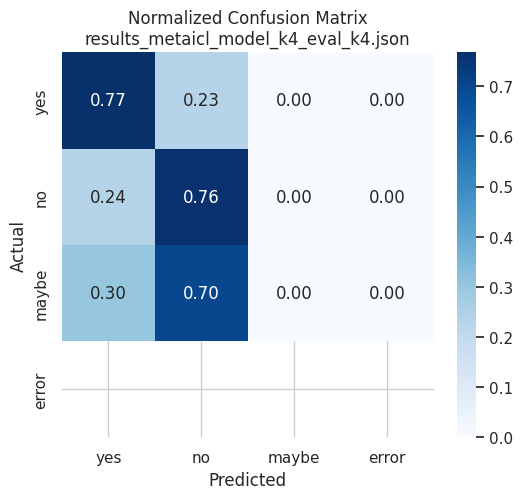

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


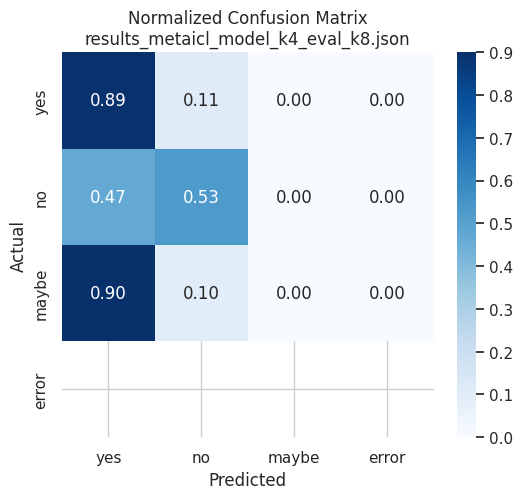

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


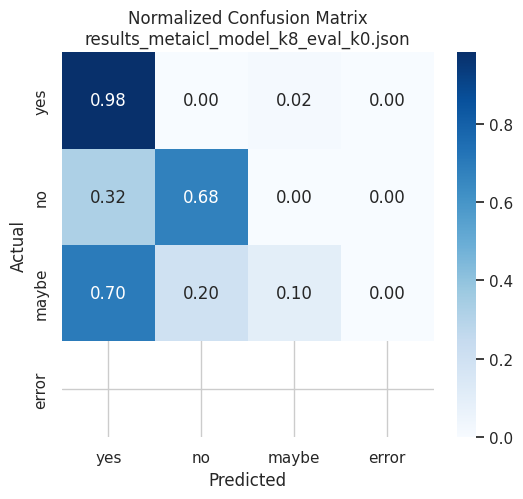

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


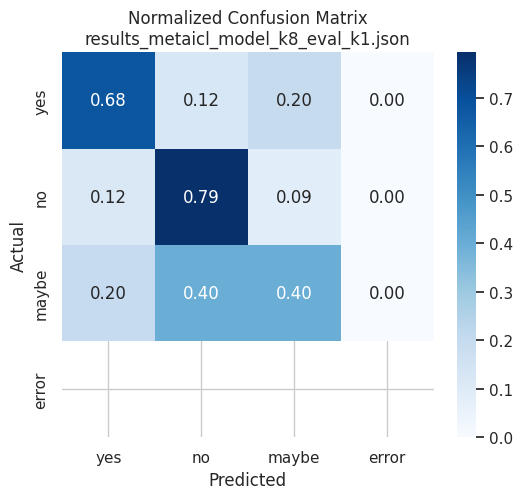

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


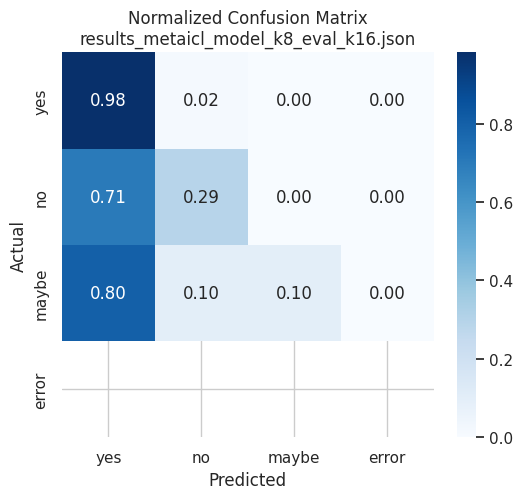

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


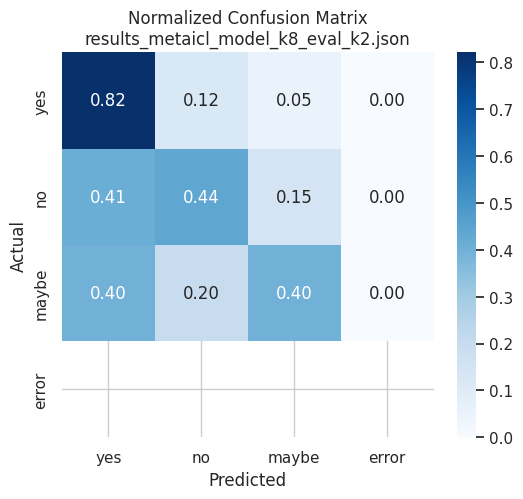

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


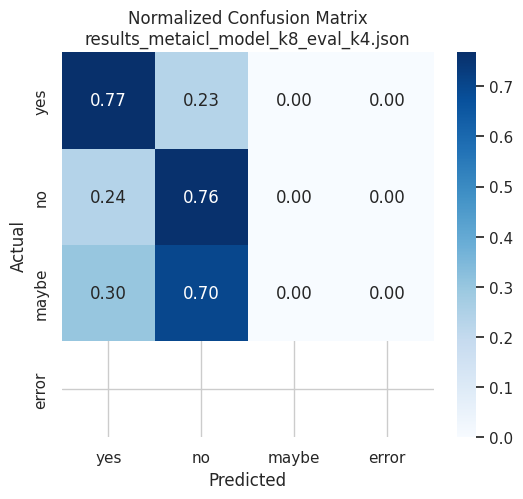

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


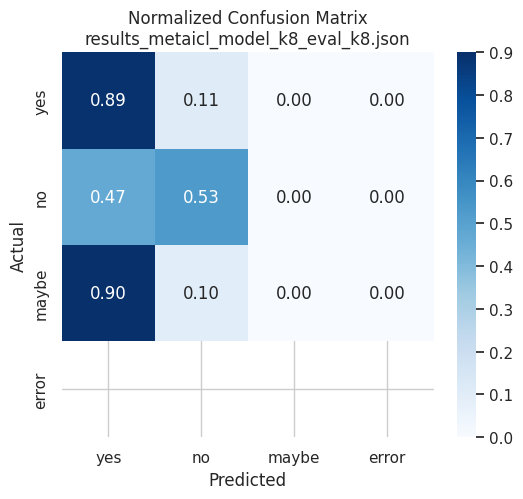

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


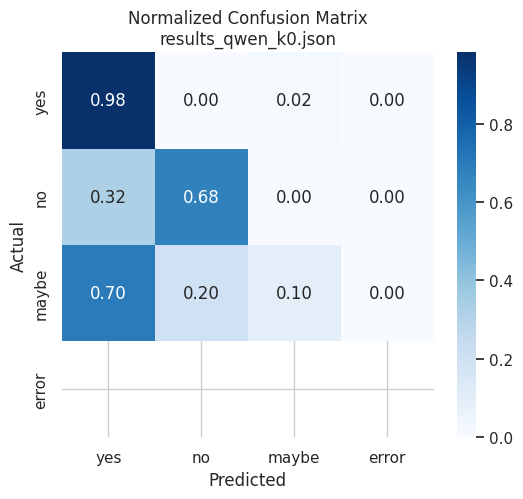

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


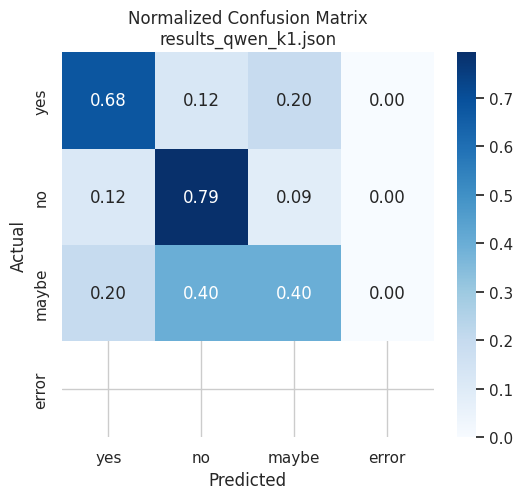

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


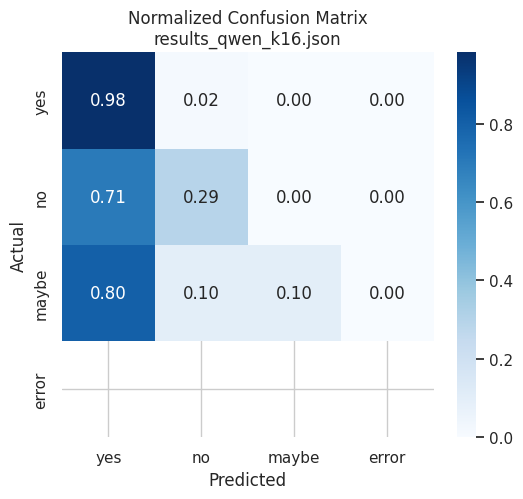

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


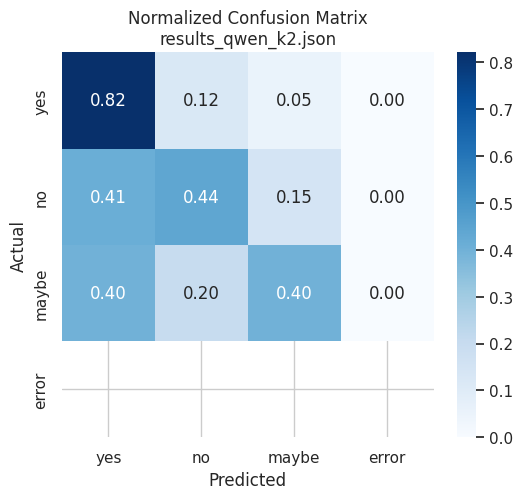

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


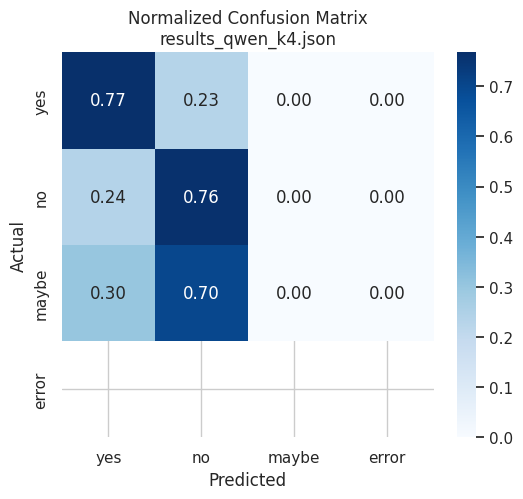

/tmp/ipykernel_7063/2304977823.py:16: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


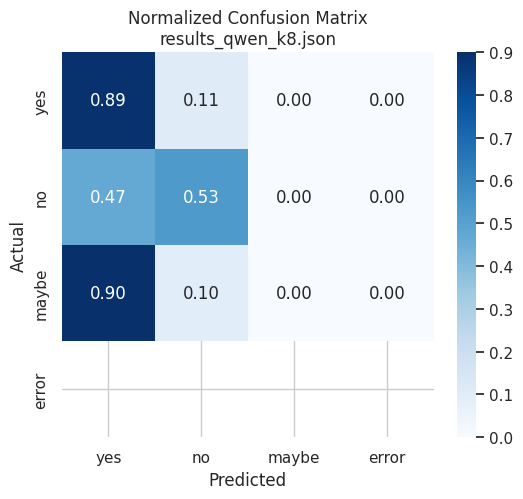

In [13]:
import json
import os
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 평가 결과가 저장된 폴더
results_dir = "../new_results"
result_files = sorted(glob.glob(os.path.join(results_dir, "results_*.json")))

def plot_confusion_matrix(y_true, y_pred, labels=None, normalize=False, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

def normalize_label(label):
    label = label.lower().strip()
    if label in {"yes", "no", "maybe"}:
        return label
    else:
        return "error"

def evaluate_result_file(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)
    preds = [normalize_label(ex["prediction"]) for ex in data]
    labels = [normalize_label(ex["label"]) for ex in data]
    return preds, labels

# 모든 파일에 대해 혼동 행렬 그리기
for filepath in result_files:
    y_pred, y_true = evaluate_result_file(filepath)
    filename = os.path.basename(filepath)
    plot_confusion_matrix(
        y_true, y_pred,
        labels=["yes", "no", "maybe", "error"],
        normalize=True,
        title=f"Normalized Confusion Matrix\n{filename}"
    )